# Plotting (a.k.a. Graphin' and Things)

## Objectives:

* Matplotlib
    * Simple plotting
        * Change attributes of plots: point style, color, etc.
        * Make axis labels
        * Add legend
    * Understand object oriented architecture
        * Figure
        * Axes
        * Axis
    * More advanced plotting
        * Sub-plots       

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Let's experiment with a toy example

In [2]:
x = np.arange(0, 10, .1)
sin_x = np.sin(x)

### Gonna plot that `sin` function!

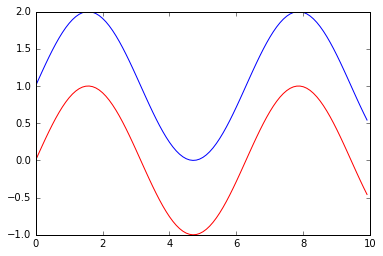

In [3]:
plt.plot(x, sin_x, color='r')
plt.plot(x, sin_x + 1)
plt.show()

## What if we want to:
* make a finer-grained plot?
    * from 5-15?
* change the color of the line?
* use points instead of a line?

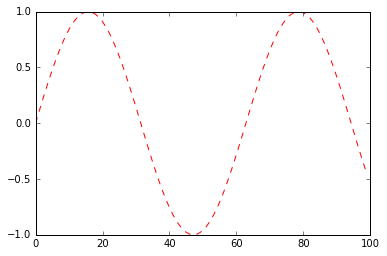

In [4]:
plt.plot(sin_x, color='r', linestyle='--')

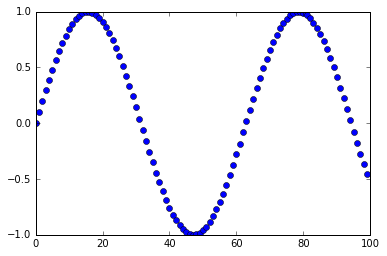

In [5]:
plt.plot(sin_x, 'bo')
plt.show()

## Let's get some more complicated state in there:
### Plot `cos` as a line and `sin` as points

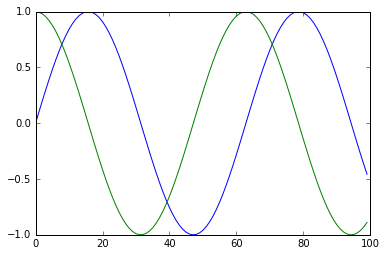

In [6]:
cos_x = np.cos(x)
plt.plot(sin_x)
plt.plot(cos_x)

### Alright, that was pretty cool, but how is matplotlib actually DOING the plotting. Is there some state, some object that the plotting is happening on??
Matplotlib actually implements an object oriented framework, it just hides it from us if we don't ask to see it. A matplotlib...plot is actually made up of three parts:
   * Figure
   * Axes
   * Axis

<br>
<div style="text-align: center"><img src="fig_objects.png" style="width: 400px"></div>

Calls to `plt.plot()` make the necessary figure and axes for the plot you're trying to make, as we saw to begin with; it will use those axes for any additional plots are changes you try to make. This is the behavior that we see just above.

However, we can explicitly control this interaction by using the more object oriented functionality of matplotlib. This approach allows us to create separate figure and axes objects and explicitly affect the state of those objects directly.

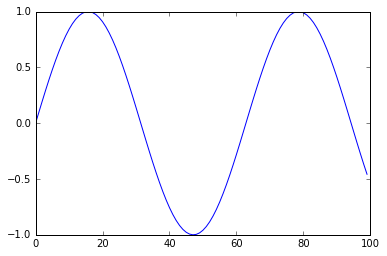

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(sin_x)

### Can we just keep adding axes to the same figure??

YES!

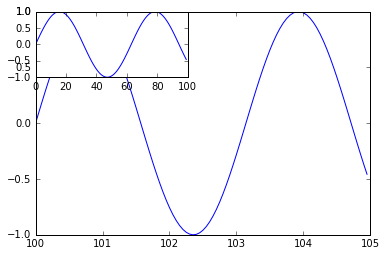

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = fig.add_subplot(3,2,1)

ax.plot(sin_x)
ax.set_xticklabels(range(100, 110))

ax2.plot(sin_x)

plt.show()

### We aren't strictly restricted to operating on the the axes objects either.

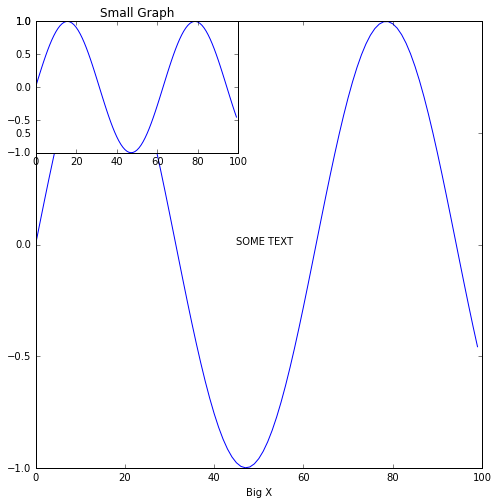

In [9]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax2 = fig.add_subplot(3,2,1)
ax.plot(sin_x)
ax2.plot(sin_x)

# Set x_label on the big graph
ax.set_xlabel('Big X')
# Set title on the small graph
ax2.set_title('Small Graph')

# Write some text: which plot will this show up on?
ax.text(45, 0, 'SOME TEXT')

# Add a title to the whole figure: suptitle
#plt.savefig('my_pretty_graph.png')

### How can we use these OO tools in matplotlib to make a fig with subplots?

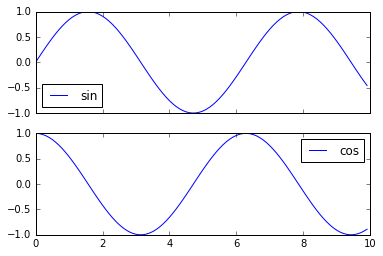

In [10]:
fig, ax_lst = plt.subplots(2, 1, sharex=True)
y_funcs = [np.sin, np.cos]
names = ['sin', 'cos']
# plot on the axis with the function in loop
for name, fun, ax in zip(names, y_funcs, ax_lst):
    ax.plot(x, fun(x), label=name)
    ax.legend(loc='best')

In [11]:
ax_lst

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11081ef50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x110f0f8d0>], dtype=object)

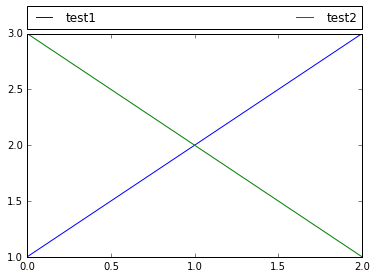

In [12]:
plt.plot([1,2,3], label="test1")
plt.plot([3,2,1], label="test2")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102),
           ncol=2, mode="expand", borderaxespad=0.) # Pulled from the matplotlib documentation

## What if our data live in a dataframe?

In [13]:
import pandas as pd
df = pd.DataFrame({'x':x, 'sinx':sin_x, 'cosx':cos_x})
df = df.set_index('x')
df.head()

,cosx,sinx
x,,
0.0,1.000000,0.000000
0.1,0.995004,0.099833
0.2,0.980067,0.198669
0.3,0.955336,0.295520
0.4,0.921061,0.389418


(-1.5, 1.5)

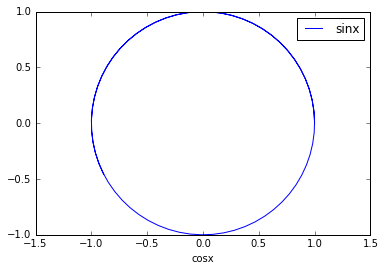

In [14]:
ax = df.plot('cosx', 'sinx')
ax.set_xlim(-1.5, 1.5)

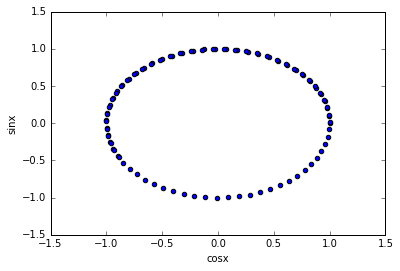

In [15]:
df.plot('cosx', 'sinx', kind='scatter')

## What if I want to plot something direct on the same plot?
Notice that there is some annoying looking return in there below the code in the cell and above the plot?

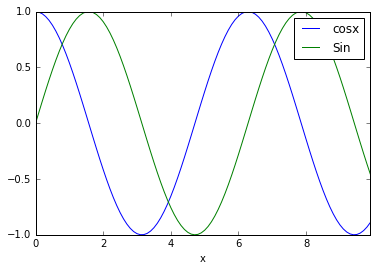

In [16]:
ax = df.cosx.plot()
ax.plot(x, sin_x, label='Sin')
ax.legend()
#Want to add labels and legend?

## That's not super helpful if we're just plotting onto the same axis since that will happen by default.

But when we're trying to do slick things like make subplots its imperative to know that we can pass an axis object to pandas plotting methods.

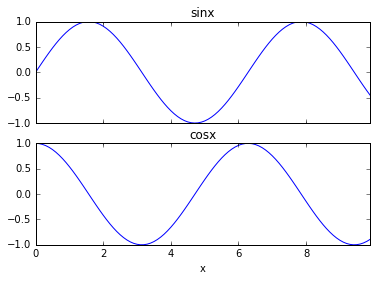

In [17]:
fig, ax_lit = plt.subplots(2,1, sharex=True)
cols = ['sinx', 'cosx']
for ax, col in zip(ax_lit, cols):
    # plot for each column
    df[col].plot(ax=ax)
    # set title for each axes
    ax.set_title(col)

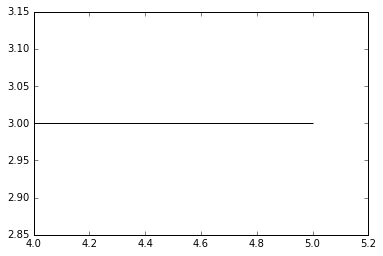

In [19]:
plt.hlines(3, 4, 5)

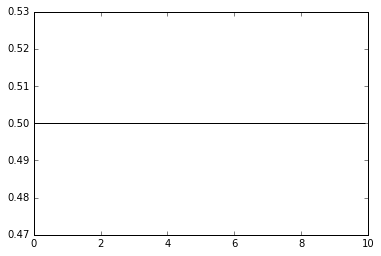

In [20]:
def horizontal_line(ax, x_data, y):
    line = ax.hlines(y, min(x_data), max(x_data))
    return [line]
fig = plt.figure()
ax = fig.add_subplot(111)
horizontal_line(ax, x, .5)
plt.show()

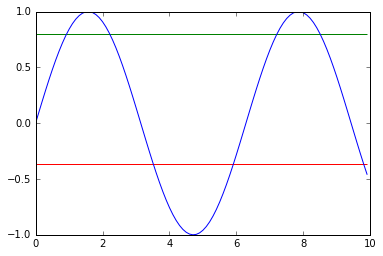

In [35]:
def iqr_plot(ax, x_data, y_data):
    # plot some data on the axes
    l1 = ax.plot(x_data, y_data)
    # plot 25th and 75th percentiles as lines
    p25, p75 = np.percentile(y_data, [25, 75])
    l2 = horizontal_line(ax, x_data, p25)
    l3 = horizontal_line(ax, x_data, p75)
    l2[0].set_color('r')
    l3[0].set_color('g')
    # return line objects
    return l1 + l2 + l3

# change so the colors of the lines are different? set_color
fig = plt.figure()
ax = fig.add_subplot(111)
iqr_plot(ax, x, sin_x)

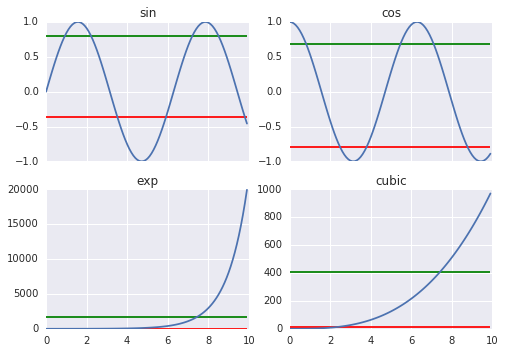

In [67]:
fig, ax_list = plt.subplots(2, 2, sharex=True)
ys = [f(x) for f in [np.sin, np.cos, np.exp, lambda x: x**3]]
names = ['sin', 'cos', 'exp', 'cubic']
# plot on each one of the axes
for y, ax, name in zip(ys, ax_list.flatten(), names):
    iqr_plot(ax, x, y)
    ax.set_title(name)

In [32]:
ax_list

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112892190>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x113ce9bd0>]], dtype=object)

## What other things can we do with Pandas?

In [39]:
df = pd.read_csv('playgolf.csv', delimiter='|' )
df.head()

,Date,Outlook,Temperature,Humidity,Windy,Result
0,07-01-2014,sunny,85,85,False,Don't Play
1,07-02-2014,sunny,80,90,True,Don't Play
2,07-03-2014,overcast,83,78,False,Play
3,07-04-2014,rain,70,96,False,Play
4,07-05-2014,rain,68,80,False,Play


In [40]:
# set the figure size
plt.rcParams['figure.figsize'] = (15, 5)

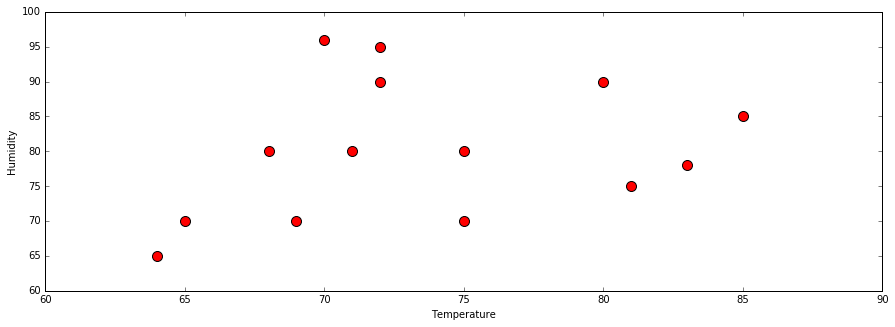

In [44]:
df[['Temperature','Humidity']].plot(kind='scatter', 
                                    x='Temperature', 
                                    y='Humidity', 
                                    color='red', s=100)

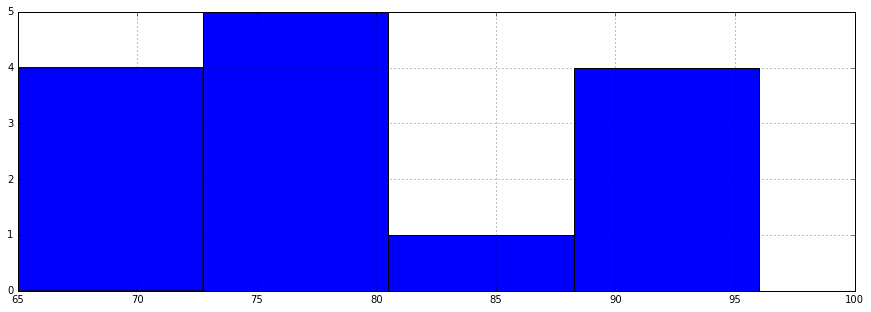

In [46]:
df.Humidity.hist(bins=4)

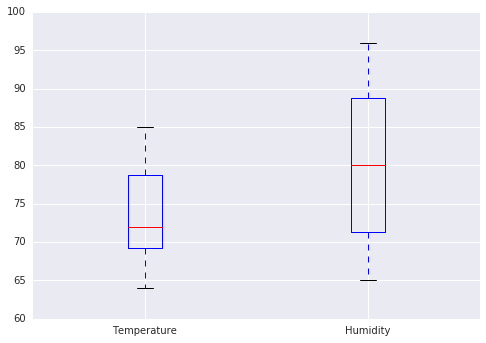

In [66]:
df[['Temperature','Humidity']].plot(kind='box')

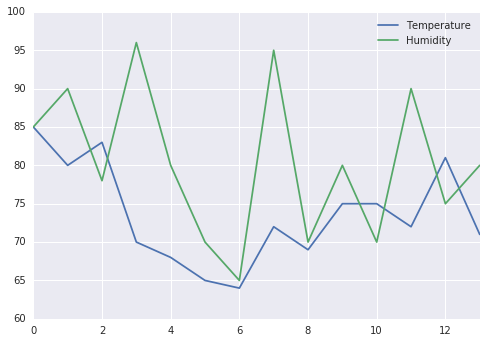

In [65]:
df[['Temperature','Humidity']].plot(kind='line')

             Temperature  Humidity     Windy
Temperature     1.000000  0.273245 -0.328866
Humidity        0.273245  1.000000 -0.254415
Windy          -0.328866 -0.254415  1.000000


([<matplotlib.axis.YTick at 0x117093a50>,
 <a list of 3 Text yticklabel objects>)

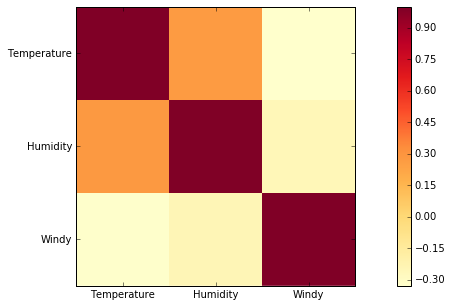

In [63]:
allcorr = df.corr()
print allcorr
plt.imshow(allcorr, cmap='YlOrRd', interpolation='none');
plt.colorbar()
plt.xticks(range(len(allcorr)), allcorr.columns)
plt.yticks(range(len(allcorr)), allcorr.columns)

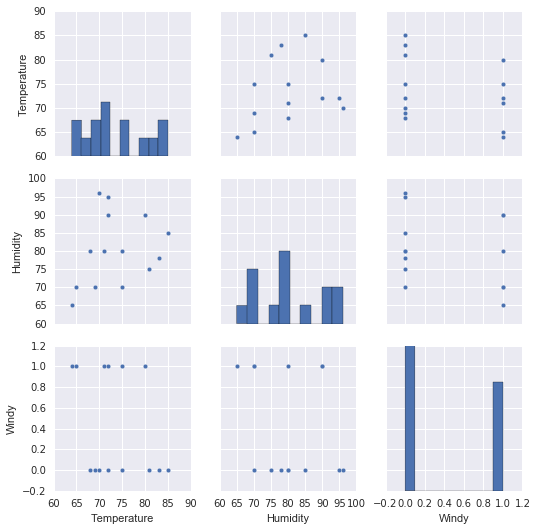

In [64]:
import seaborn as sns
sns.pairplot(df)

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


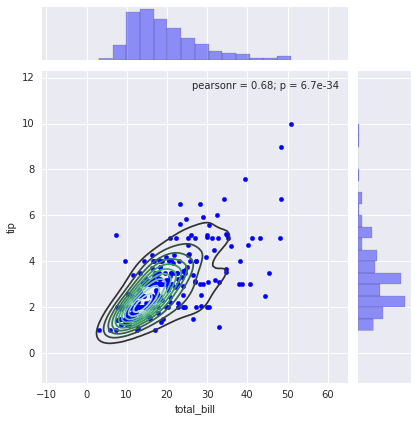

In [70]:
tips_df = sns.load_dataset("tips")
print tips_df.head()
# more info: http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.jointplot.html#seaborn.jointplot
g = sns.jointplot(x='total_bill', y='tip', data=tips_df, color="b")
g.plot_joint(sns.kdeplot, color='b', n_levels=10)

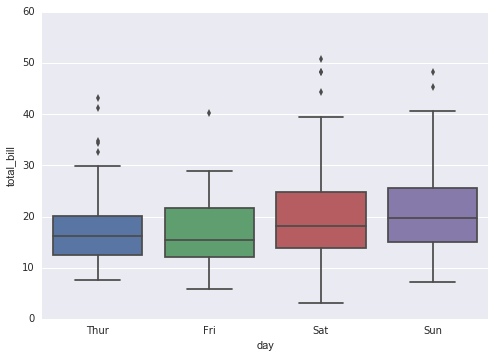

In [71]:
sns.boxplot("day", "total_bill", data=tips_df)

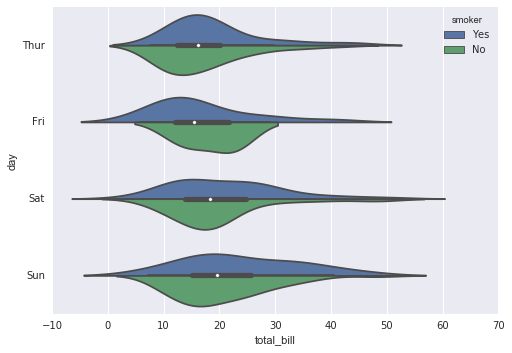

In [78]:
sns.violinplot("total_bill", "day", 'smoker',
               data=tips_df, split=True)

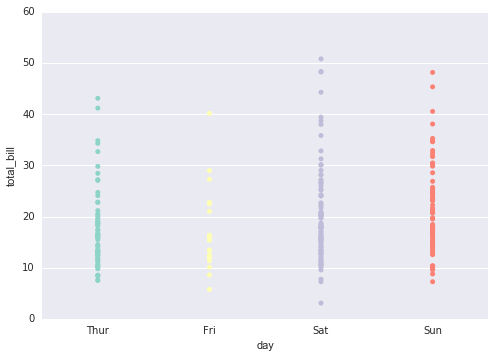

In [76]:
sns.stripplot("day", "total_bill", data=tips_df, palette='Set3')
# Can we combine these two plotes with the OO aspects of matplotlib?

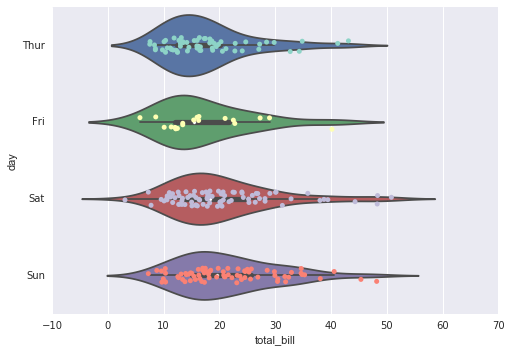

In [83]:
ax = sns.violinplot("total_bill", "day",
               data=tips_df, split=False)
sns.stripplot("total_bill", "day", data=tips_df, palette='Set3', jitter=True, ax=ax)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


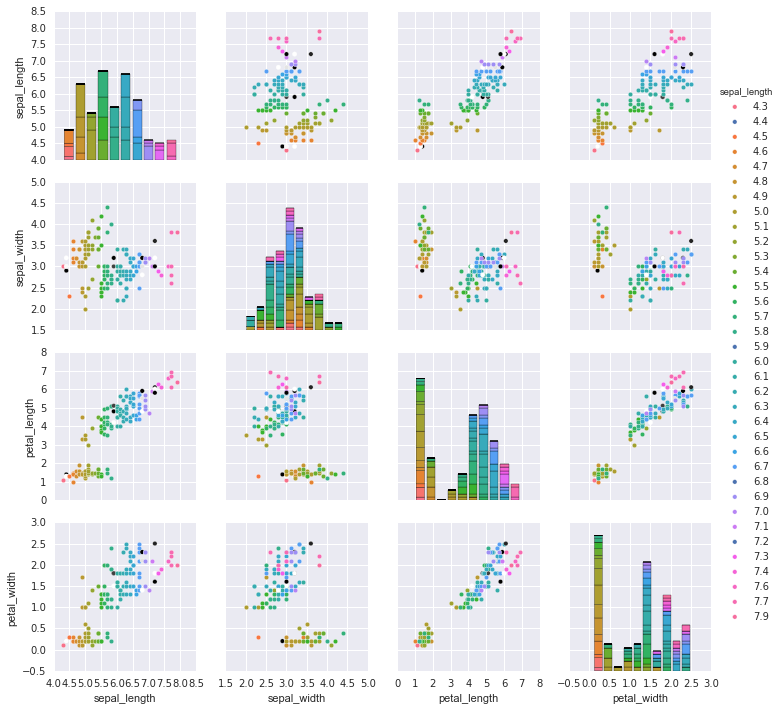

In [87]:
iris = sns.load_dataset("iris")
print iris.head()
sns.pairplot(iris, hue='sepal_length')
# add color?

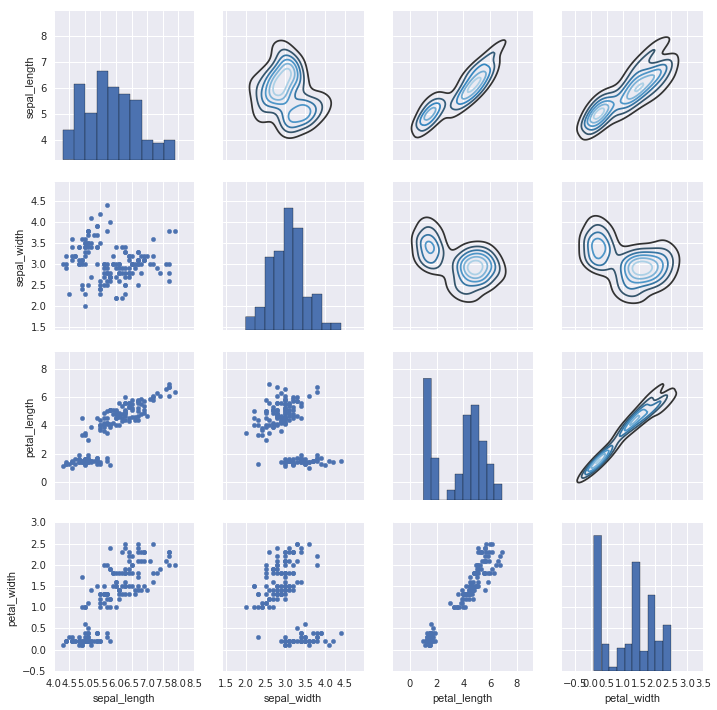

In [85]:
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_lower(plt.scatter)
g.map_upper(sns.kdeplot, cmap="Blues_d", n_levels=6)

In [88]:
pd.cut?